In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as DT



In [143]:
#Cargamos los datos en dataframes
educacion=pd.read_csv('fiuba_1_postulantes_educacion.csv')
genero_edad=pd.read_csv('fiuba_2_postulantes_genero_y_edad.csv')
vistas=pd.read_csv('fiuba_3_vistas.csv')
postulaciones=pd.read_csv('fiuba_4_postulaciones.csv')
avisos_online=pd.read_csv('fiuba_5_avisos_online.csv')
avisos_detalle=pd.read_csv('fiuba_6_avisos_detalle.csv')



In [144]:
educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298231 entries, 0 to 298230
Data columns (total 3 columns):
idpostulante    298231 non-null object
nombre          298231 non-null object
estado          298231 non-null object
dtypes: object(3)
memory usage: 6.8+ MB


In [145]:
genero_edad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 3 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
dtypes: object(3)
memory usage: 4.6+ MB


In [146]:
vistas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961897 entries, 0 to 961896
Data columns (total 3 columns):
idAviso         961897 non-null int64
timestamp       961897 non-null object
idpostulante    961897 non-null object
dtypes: int64(1), object(2)
memory usage: 22.0+ MB


In [147]:
postulaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401623 entries, 0 to 3401622
Data columns (total 3 columns):
idaviso             int64
idpostulante        object
fechapostulacion    object
dtypes: int64(1), object(2)
memory usage: 77.9+ MB


In [148]:
avisos_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5028 entries, 0 to 5027
Data columns (total 1 columns):
idaviso    5028 non-null int64
dtypes: int64(1)
memory usage: 39.4 KB


In [149]:
avisos_detalle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13534 entries, 0 to 13533
Data columns (total 11 columns):
idaviso                 13534 non-null int64
idpais                  13534 non-null int64
titulo                  13534 non-null object
descripcion             13534 non-null object
nombre_zona             13534 non-null object
ciudad                  47 non-null object
mapacalle               872 non-null object
tipo_de_trabajo         13534 non-null object
nivel_laboral           13534 non-null object
nombre_area             13534 non-null object
denominacion_empresa    13529 non-null object
dtypes: int64(2), object(9)
memory usage: 1.1+ MB


In [150]:
#Cambiamos los nombres de las columnas para que sea más sencillo identificarlas
educacion.rename(columns={'nombre':'Nivel','estado':'Estado'},inplace=True)
genero_edad.rename(columns={'fechanacimiento':'Fecha_Nacimiento','sexo':'Sexo'},inplace=True)
vistas.rename(columns={'idAviso':'idaviso','timestamp':'Fecha_Vista'},inplace=True)
postulaciones.rename(columns={'fechapostulacion':'Fecha_Postulacion'},inplace=True)
avisos_detalle.rename(columns={'titulo':'Titulo','descripcion':'Descripcion','nombre_zona':'Zona','ciudad':'Ciudad','tipo_de_trabajo':'Tipo_de_Trabajo','nivel_laboral':'Nivel_Laboral','nombre_area':'Nombre_Area'},inplace=True)

In [151]:
#Realizamos la convesion de las fechas
postulaciones['Fecha_Postulacion']=pd.to_datetime(postulaciones['Fecha_Postulacion'])
vistas['Fecha_Vista']=pd.to_datetime(vistas['Fecha_Vista'])
genero_edad['Fecha_Nacimiento'] = pd.to_datetime(genero_edad['Fecha_Nacimiento'],errors='coerce')

## Analisis de la cantidad de areas distintas de las postulaciones de cada usuario

En esta seccion vamos a analizar la cantidad de areas laborales diferentes a las que los
usuarios realizan postulaciones de acuerdo a su edad.
Dejaremos fuera a los usuarios que no hayan realizado postulacion alguna, ya que no sabemos
si la razon de su inactividad es la falta de ofertas que se ajusten a su busqueda laboral, o
alguna otra razon. 

In [152]:
#Tenemos un DF en el que tenemos los detalles de cada postulacion
postulaciones_detalle = pd.merge(postulaciones,avisos_detalle,on= 'idaviso')
postulaciones_detalle.head()

,idaviso,idpostulante,Fecha_Postulacion,idpais,Titulo,Descripcion,Zona,Ciudad,mapacalle,Tipo_de_Trabajo,Nivel_Laboral,Nombre_Area,denominacion_empresa
0,1112257047,NM5M,2018-01-15 16:22:34,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
1,1112257047,1kJqGb,2018-01-15 10:23:11,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
2,1112257047,eOE9Rr,2018-01-15 10:42:07,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
3,1112257047,Zrx8Xz,2018-01-30 10:18:14,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
4,1112257047,ZrKNQY,2018-01-16 17:19:38,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA


In [153]:
#Tenemos un DF con cada usuario que haya realizado alguna postulacion y el conjunto de 
#areas a las que ese usuario se postulo
areas_por_postulante = postulaciones_detalle.groupby('idpostulante').agg({'Nombre_Area': lambda x: set(x)
                                                                         ,'idaviso':'count'})
areas_por_postulante.reset_index(inplace = True)
areas_por_postulante.rename(columns = {'Nombre_Area':'Areas', 'idaviso':'cantidad_postulaciones'},inplace = True)
areas_por_postulante.head()


,idpostulante,Areas,cantidad_postulaciones
0,0z5VvGv,"{Ventas, Data Entry, Comercial, Hotelería, Pro...",31
1,0zB026d,{Producción},3
2,0zB03O9,"{Comercial, Recepcionista, Tesorería, Administ...",16
3,0zB08lq,{Producción},1
4,0zB0NWY,{Atención al Cliente},1


In [154]:
#Aqui juntamos el DF anterior con la edad de los postulantes

areas_edad = pd.merge(areas_por_postulante,genero_edad,on='idpostulante',how = 'inner')
hoy = pd.Timestamp(DT.datetime.now())
areas_edad['Edad'] = (hoy - areas_edad['Fecha_Nacimiento']).astype('<m8[Y]')
areas_edad = areas_edad.drop(labels = ['Fecha_Nacimiento','Sexo'],axis = 1)
areas_edad.head()

,idpostulante,Areas,cantidad_postulaciones,Edad
0,0z5VvGv,"{Ventas, Data Entry, Comercial, Hotelería, Pro...",31,30.0
1,0zB026d,{Producción},3,40.0
2,0zB03O9,"{Comercial, Recepcionista, Tesorería, Administ...",16,30.0
3,0zB08lq,{Producción},1,45.0
4,0zB0NWY,{Atención al Cliente},1,30.0


In [155]:
#Aqui obtenemos la cantidad de areas diferentes a la que cada postulante aplico
areas_edad['cantidad_areas'] = areas_edad['Areas'].apply(len)
areas_edad.head()

,idpostulante,Areas,cantidad_postulaciones,Edad,cantidad_areas
0,0z5VvGv,"{Ventas, Data Entry, Comercial, Hotelería, Pro...",31,30.0,11
1,0zB026d,{Producción},3,40.0,1
2,0zB03O9,"{Comercial, Recepcionista, Tesorería, Administ...",16,30.0,5
3,0zB08lq,{Producción},1,45.0,1
4,0zB0NWY,{Atención al Cliente},1,30.0,1


In [156]:
#Aqui calculamos promedio por edad de areas distintas a las que se postulan los usuarios

areas_edad_grouped = areas_edad.groupby('Edad').agg({'cantidad_areas':'mean','idpostulante':'count'})
areas_edad_grouped.reset_index(inplace = True)
areas_edad_grouped.rename(columns={'idpostulante':'cantidad_postulantes'}, inplace = True)
areas_edad_grouped = areas_edad_grouped.loc[areas_edad_grouped['cantidad_postulantes'] > 50]
areas_edad_grouped

,Edad,cantidad_areas,cantidad_postulantes
1,17.0,4.346667,150
2,18.0,5.489354,2677
3,19.0,5.804772,5742
4,20.0,6.020013,7745
5,21.0,6.307692,9594
6,22.0,6.315224,10602
7,23.0,6.391700,11325
8,24.0,6.446063,11467
9,25.0,6.288499,11695
10,26.0,6.300794,11832


Text(0,0.5,'Cantidad de Areas')

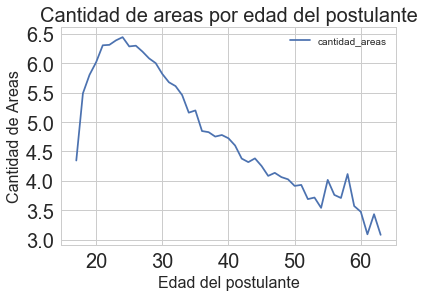

In [157]:
areas_por_edad_plot = areas_edad_grouped.plot(kind = 'line',
                                             x='Edad',
                                             y='cantidad_areas',
                                             fontsize = 20)
areas_por_edad_plot.set_title('Cantidad de areas por edad del postulante',fontsize = 20)
areas_por_edad_plot.set_xlabel('Edad del postulante',fontsize=16)
areas_por_edad_plot.set_ylabel('Cantidad de Areas',fontsize = 16)

Vemos claramente que los usuarios entre 20 y 30 años son los que aplican a una mayor cantidad de areas laborales, y a medida que la edad avanza esa cantidad va disminuyendo casi constantemente.

In [158]:
areas_edad['Edad'] = pd.cut(areas_edad['Edad'], [15,20,25,35,40,45,50,55,60,65,70,100])
areas_edad.head()

,idpostulante,Areas,cantidad_postulaciones,Edad,cantidad_areas
0,0z5VvGv,"{Ventas, Data Entry, Comercial, Hotelería, Pro...",31,"(25, 35]",11
1,0zB026d,{Producción},3,"(35, 40]",1
2,0zB03O9,"{Comercial, Recepcionista, Tesorería, Administ...",16,"(25, 35]",5
3,0zB08lq,{Producción},1,"(40, 45]",1
4,0zB0NWY,{Atención al Cliente},1,"(25, 35]",1


In [159]:
areas_edad_grouped = areas_edad.groupby('Edad').agg({'cantidad_areas':'mean','idpostulante':'count'})
areas_edad_grouped.reset_index(inplace = True)
areas_edad_grouped.rename(columns={'idpostulante':'cantidad_postulantes'}, inplace = True)
areas_edad_grouped = areas_edad_grouped.loc[areas_edad_grouped['cantidad_postulantes'] > 150]
areas_edad_grouped

,Edad,cantidad_areas,cantidad_postulantes
0,"(15, 20]",5.841792,16314
1,"(20, 25]",6.351462,54683
2,"(25, 35]",5.855995,82046
3,"(35, 40]",4.793536,19369
4,"(40, 45]",4.405392,10385
5,"(45, 50]",4.056830,5754
6,"(50, 55]",3.777320,3157
7,"(55, 60]",3.751449,1553
8,"(60, 65]",3.307175,446


Text(0,0.5,'Cantidad de Areas')

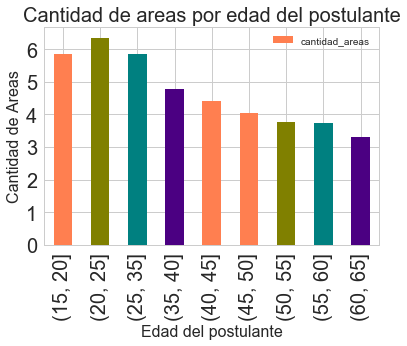

In [160]:
areas_por_edad_plot = areas_edad_grouped.plot(kind = 'bar',
                                             x='Edad',
                                             y='cantidad_areas',
                                             fontsize = 20,
                                             color = ['coral','olive','teal','indigo'])
areas_por_edad_plot.set_title('Cantidad de areas por edad del postulante',fontsize = 20)
areas_por_edad_plot.set_xlabel('Edad del postulante',fontsize=16)
areas_por_edad_plot.set_ylabel('Cantidad de Areas',fontsize = 16)


En este grafico agrupamos a los postulantes segun su edad y podemos ver la misma tendencia que en el grafico anterior: con la edad la cantidad de areas distintas a los que se postulan los usuarios disminuye.